In [28]:
%matplotlib inline
import sys
import os
import json
import csv

/Users/vlandham/code/python/miniconda3/envs/spotify/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [29]:
import matplotlib.pyplot as plt

In [10]:
from IPython.display import Image

In [26]:
from io import BytesIO
import PIL

In [3]:
def import_data(filename):
    data = []
    with open(filename) as json_data:
        data = json.load(json_data)
    return data

In [18]:
cats = import_data('./data/faces.json')

In [19]:
len(cats)

10

In [20]:
len(cats[0]['artist_details'])

672

In [69]:
len(cats[0]['artist_details'][2]['faces'])

1

In [70]:
artist = cats[0]['artist_details'][2]
face = artist['faces'][0]
lmarks = face['faceLandmarks']

In [71]:
face

{'faceAttributes': {'age': 29.8,
  'facialHair': {'beard': 0.5, 'moustache': 0.5, 'sideburns': 0.4},
  'gender': 'male',
  'glasses': 'NoGlasses',
  'headPose': {'pitch': 0.0, 'roll': 0.1, 'yaw': -0.5},
  'smile': 0.002},
 'faceId': '0269b792-3df9-4765-af35-d6b106a2b34c',
 'faceLandmarks': {'eyeLeftBottom': {'x': 250.1, 'y': 293.2},
  'eyeLeftInner': {'x': 269.2, 'y': 286.6},
  'eyeLeftOuter': {'x': 232.0, 'y': 286.0},
  'eyeLeftTop': {'x': 249.7, 'y': 274.3},
  'eyeRightBottom': {'x': 361.5, 'y': 292.4},
  'eyeRightInner': {'x': 342.2, 'y': 285.7},
  'eyeRightOuter': {'x': 380.7, 'y': 284.2},
  'eyeRightTop': {'x': 360.8, 'y': 273.3},
  'eyebrowLeftInner': {'x': 278.7, 'y': 262.8},
  'eyebrowLeftOuter': {'x': 207.0, 'y': 267.8},
  'eyebrowRightInner': {'x': 333.4, 'y': 259.4},
  'eyebrowRightOuter': {'x': 407.4, 'y': 271.1},
  'mouthLeft': {'x': 256.8, 'y': 399.1},
  'mouthRight': {'x': 354.4, 'y': 398.3},
  'noseLeftAlarOutTip': {'x': 272.0, 'y': 351.1},
  'noseLeftAlarTop': {'x': 28

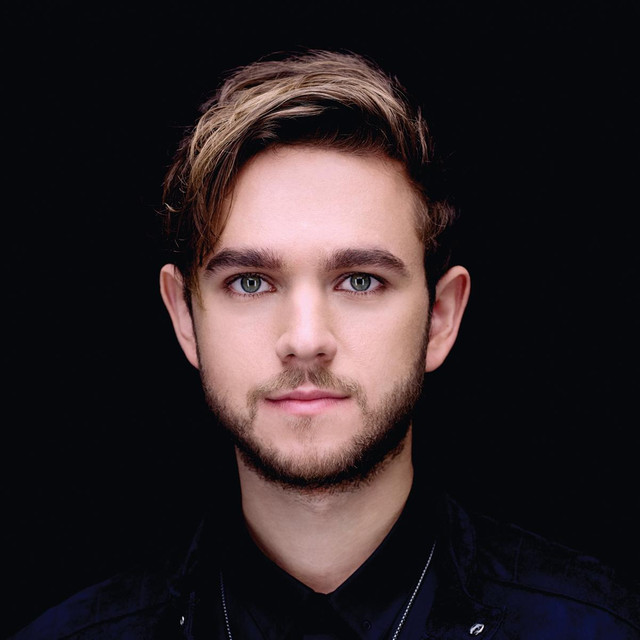

In [72]:
# lets take a look at the first image
image_file = 'data/imgs/' + cats[0]['id'] + '/' + artist['id'] + '.jpg'
Image(filename=image_file) 

In [34]:
from PIL import ImageDraw

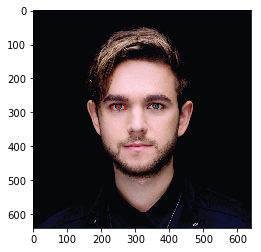

In [77]:
def rec(xy, size = 6):
    return [(xy['x'] - (size / 2), xy['y'] - (size / 2)), (xy['x'] + (size / 2), xy['y'] + (size / 2))]

pimage = PIL.Image.open(image_file)
draw = ImageDraw.Draw(pimage)
#draw.rectangle(rec(lmarks['eyeLeftBottom']), fill="red")
#draw.rectangle(rec(lmarks['eyeLeftTop']), fill="red")
draw.rectangle(rec(lmarks['eyeLeftInner']), fill="red")
draw.rectangle(rec(lmarks['eyeLeftOuter']), fill="red")
draw.rectangle(rec(lmarks['pupilLeft']), fill="red")
plt.figure()
plt.imshow(pimage)
#Image(pimage)

In [49]:
from IPython import display
def display_pil_image(im):
   """Displayhook function for PIL Images, rendered as PNG."""

   b = BytesIO()
   im.save(b, format='png')
   data = b.getvalue()

   ip_img = display.Image(data=data, format='png', embed=True)
   return ip_img._repr_png_()

In [ ]:
def get_pupil_pos()

def detect_gaze(face):
    if face['faceAttributes']['glasses'] === 'Sunglasses':
        return 'sunglasses'
    

In [98]:
def get_row(cat, artist, face):
    cat_name = cat['name']
    cat_id = cat['id']
    artist_id = artist['id']
    artist_name = artist['name']
    genres = ";".join(artist['genres'])
    row = {}
    if not face:
        row = {
            "cat_id": cat_id,                
            "cat_name": cat_name,
            "artist_id": artist_id,
            "artist_name": artist_name,
            "genres": genres,
            "face_count": 0
        }
    else:
        lmarks = face['faceLandmarks']
        attrs = face['faceAttributes']
        face_id = face['faceId']
        face_pitch = attrs['headPose']['pitch']
        face_yaw = attrs['headPose']['yaw']
        face_roll = attrs['headPose']['roll']
        face_gender = attrs['gender']
        face_glasses = attrs['glasses']
        face_height = face['faceRectangle']['height']
        face_width = face['faceRectangle']['width']
        hair = attrs['facialHair']
        face_beard = hair['beard']
        face_moustache = hair['moustache']
        face_sideburns = hair['sideburns']
        face_smile = attrs['smile']
        row = {
            "cat_id": cat_id,                
            "cat_name": cat_name,
            "artist_id": artist_id,
            "artist_name": artist_name,
            "genres": genres,
            "face_count": len(artist['faces']),
            "face_id": face_id,
            "face_pitch": face_pitch,
            "face_yaw": face_yaw,
            "face_roll": face_roll,
            "face_gender": face_gender,
            "face_glasses": face_glasses,
            "face_height": face_height,
            "face_width": face_width,
            "face_beard": face_beard,
            "face_moustache": face_moustache,
            "face_sideburns": face_sideburns,
            "face_smile": face_smile
        }
        
    return row

rows = []
for cat in cats:    
    for artist in cat['artist_details']:
        faces = artist['faces']
        if len(faces) == 0:
            faces = [{'fake'}]
        for face in faces:
            row = {}
            if 'faceLandmarks' not in face:
                row = get_row(cat, artist, None)
                
            else:
                row = get_row(cat, artist, face)

            rows.append(row)
            
len(rows)

14434

In [99]:
print(rows[0].keys())

dict_keys(['cat_id', 'cat_name', 'artist_id', 'artist_name', 'genres', 'face_count', 'face_id', 'face_pitch', 'face_yaw', 'face_roll', 'face_gender', 'face_glasses', 'face_height', 'face_width', 'face_beard', 'face_moustache', 'face_sideburns', 'face_smile'])


In [100]:
with open('data/faces.csv', 'w') as f:
    w = csv.DictWriter(f, rows[0].keys())
    w.writeheader()
    w.writerows(rows)